# Q1-NN

### Dependencies 


This quantum algorithm uses qiskit, numpy, skelearn  and seaborn as dependencies to run the cide.

In [1]:
# import sklearn to load the iris dataset and split the dataset in train and test model, and the metric confusion matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import pandas to use seaborn plots as hue parameter
import pandas as pd

# import seaborn to plot the iris dataset
import seaborn as sns

# import numpy for postprocessing to find the k-nn label
import numpy as np

# import qiskit minimal methods to use quantum circuit and use qubits as the classical bits
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,transpile
from qiskit.circuit.library.standard_gates import RYGate,RZGate

import sys
import os
cwd = os.getcwd()
sep = os.path.sep
dir = sep.join(cwd.split(sep)[:-2])
sys.path.append(dir) 

from qknn.functions import qknn_experiments

# Dataset

Obtained  iris dataset from sklearn using dataset module. The iris dataset is used, which has 3 classes: **Iris-setosa**,**Iris-versicolor**,**Iris-virginica**, each with 50 instances, resulting in a total of 150.


In [2]:
iris = datasets.load_iris()

This dataset plot using Seaborn module, a dataframe is required to read the variables, denoted as 'var1', 'var2', 'var3', and 'var4', along with the 'class' for color differentiation. Additionally, the chosen color palette is 'Paired'. 

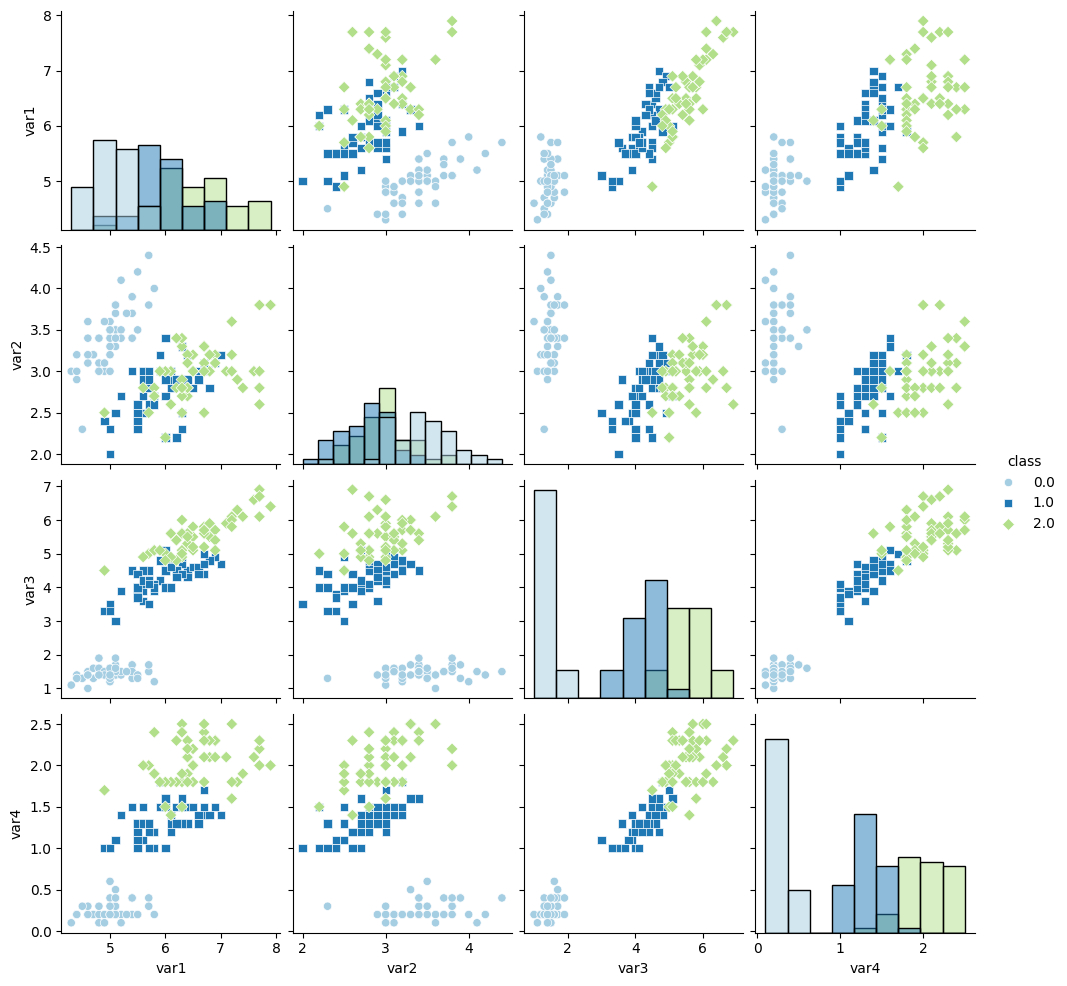

In [3]:
df_iris = pd.DataFrame(np.append(iris['data'],np.atleast_2d(iris['target']).T, axis=1))
df_iris.columns =['var1', 'var2', 'var3', 'var4',"class"]
sns.pairplot(df_iris,hue="class", diag_kind="hist", markers=["o", "s", "D"], palette="Paired")

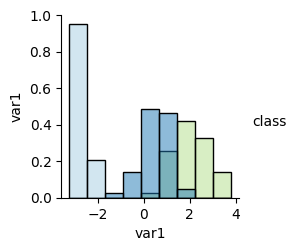

In [4]:
from sklearn import decomposition

np.random.seed(5)

pca = decomposition.PCA(n_components=1)
X = iris['data']
pca.fit(X)
X = pca.transform(X)

df_iris = pd.DataFrame(np.append(X,np.atleast_2d(iris['target']).T, axis=1))
df_iris.columns =['var1',"class"]
iris['data'] = X
sns.pairplot(df_iris,hue="class", diag_kind="hist", markers=["o", "s", "D"], palette="Paired")

The hold-out method is used, with a split of 70% for the training set and 30% for the test set.

In [5]:
x_train, x_test, y_train, y_test =train_test_split(iris['data'], iris['target'], train_size=0.7, test_size=0.3, random_state=18)

In [6]:
print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 105
Number of original test examples: 45


### Experiments

Experiments of the QK-NN with size of QRAM of 8, 16, 32, 64, and 128 cells of memory.

###  Results

#### RY

([77.77777777777779, 75.55555555555556, 71.11111111111111, 75.55555555555556, 77.77777777777779, 77.77777777777779, 77.77777777777779, 75.55555555555556, 73.33333333333333, 77.77777777777779], [82.22222222222221, 77.77777777777779, 80.0, 82.22222222222221, 82.22222222222221, 80.0, 80.0, 77.77777777777779, 75.55555555555556, 80.0], [82.22222222222221, 77.77777777777779, 75.55555555555556, 71.11111111111111, 77.77777777777779, 80.0, 80.0, 88.88888888888889, 77.77777777777779, 82.22222222222221], [82.22222222222221, 84.44444444444444, 77.77777777777779, 84.44444444444444, 71.11111111111111, 77.77777777777779, 75.55555555555556, 84.44444444444444, 84.44444444444444, 84.44444444444444], [])
The MAE value of each size is 
MAE of  QRAM of size 8 cells of memory with 76.00 +/- 1.78.
MAE of  QRAM of size 16 cells of memory with 79.78 +/- 1.64.
MAE of  QRAM of size 32 cells of memory with 79.33 +/- 3.33.
MAE of  QRAM of size 64 cells of memory with 80.67 +/- 4.09.


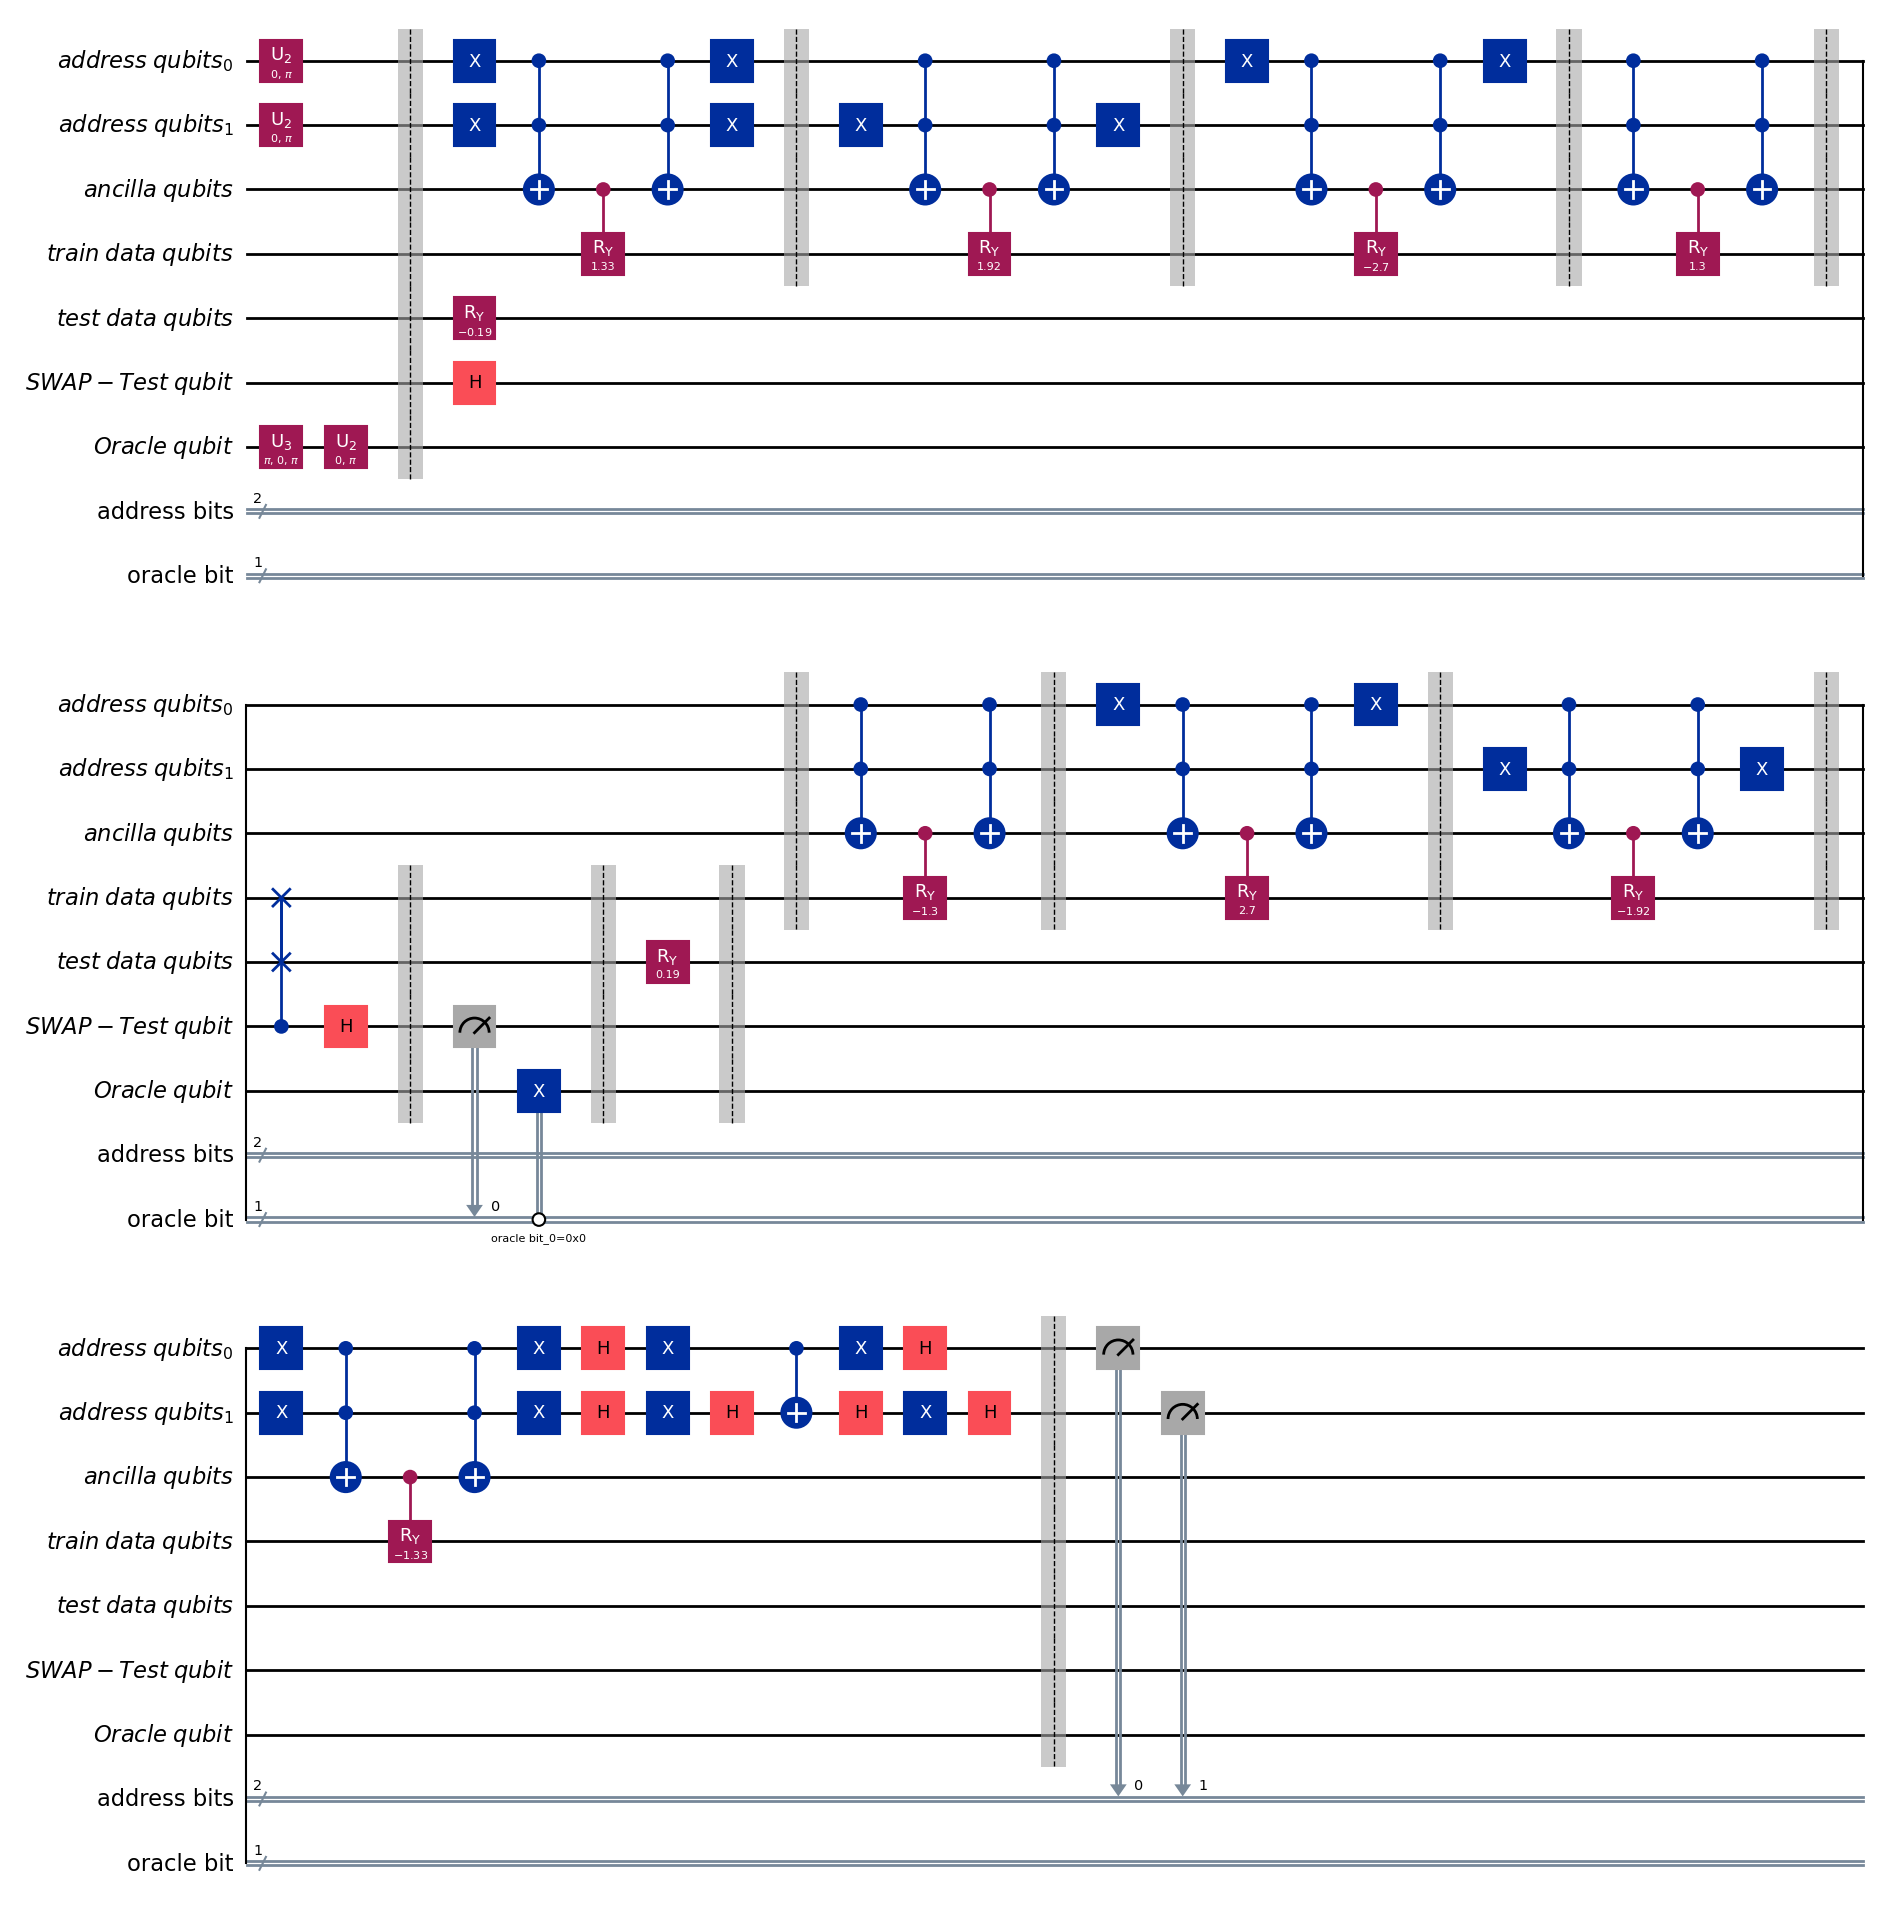

In [15]:
experiment_size = 10
min_QRAM = 3
max_QRAM = 7
qknn_e = qknn_experiments(
    x_test=x_test,
    x_train=x_train,
    y_test=y_test,
    y_train=y_train,
    features=features,
    min_QRAM=min_QRAM,
    max_QRAM=max_QRAM,
    max_trials=1,
    rotation="ry",
    experiment_size=experiment_size)

print(qknn_e.experiments_knn(k=1))
qknn_e.print_results()
qknn_e.draw_qknn(0).decompose().draw("mpl")

#### RZ

([73.33333333333333, 75.55555555555556, 75.55555555555556, 77.77777777777779, 73.33333333333333, 82.22222222222221, 80.0, 75.55555555555556, 82.22222222222221, 75.55555555555556], [82.22222222222221, 77.77777777777779, 84.44444444444444, 80.0, 77.77777777777779, 82.22222222222221, 84.44444444444444, 82.22222222222221, 80.0, 82.22222222222221], [84.44444444444444, 75.55555555555556, 77.77777777777779, 75.55555555555556, 80.0, 73.33333333333333, 77.77777777777779, 84.44444444444444, 84.44444444444444, 80.0], [80.0, 77.77777777777779, 73.33333333333333, 77.77777777777779, 75.55555555555556, 77.77777777777779, 80.0, 73.33333333333333, 75.55555555555556, 82.22222222222221], [])
The MAE value of each size is 
MAE of  QRAM of size 8 cells of memory with 77.11 +/- 2.76.
MAE of  QRAM of size 16 cells of memory with 81.33 +/- 1.96.
MAE of  QRAM of size 32 cells of memory with 79.33 +/- 3.33.
MAE of  QRAM of size 64 cells of memory with 77.33 +/- 2.31.


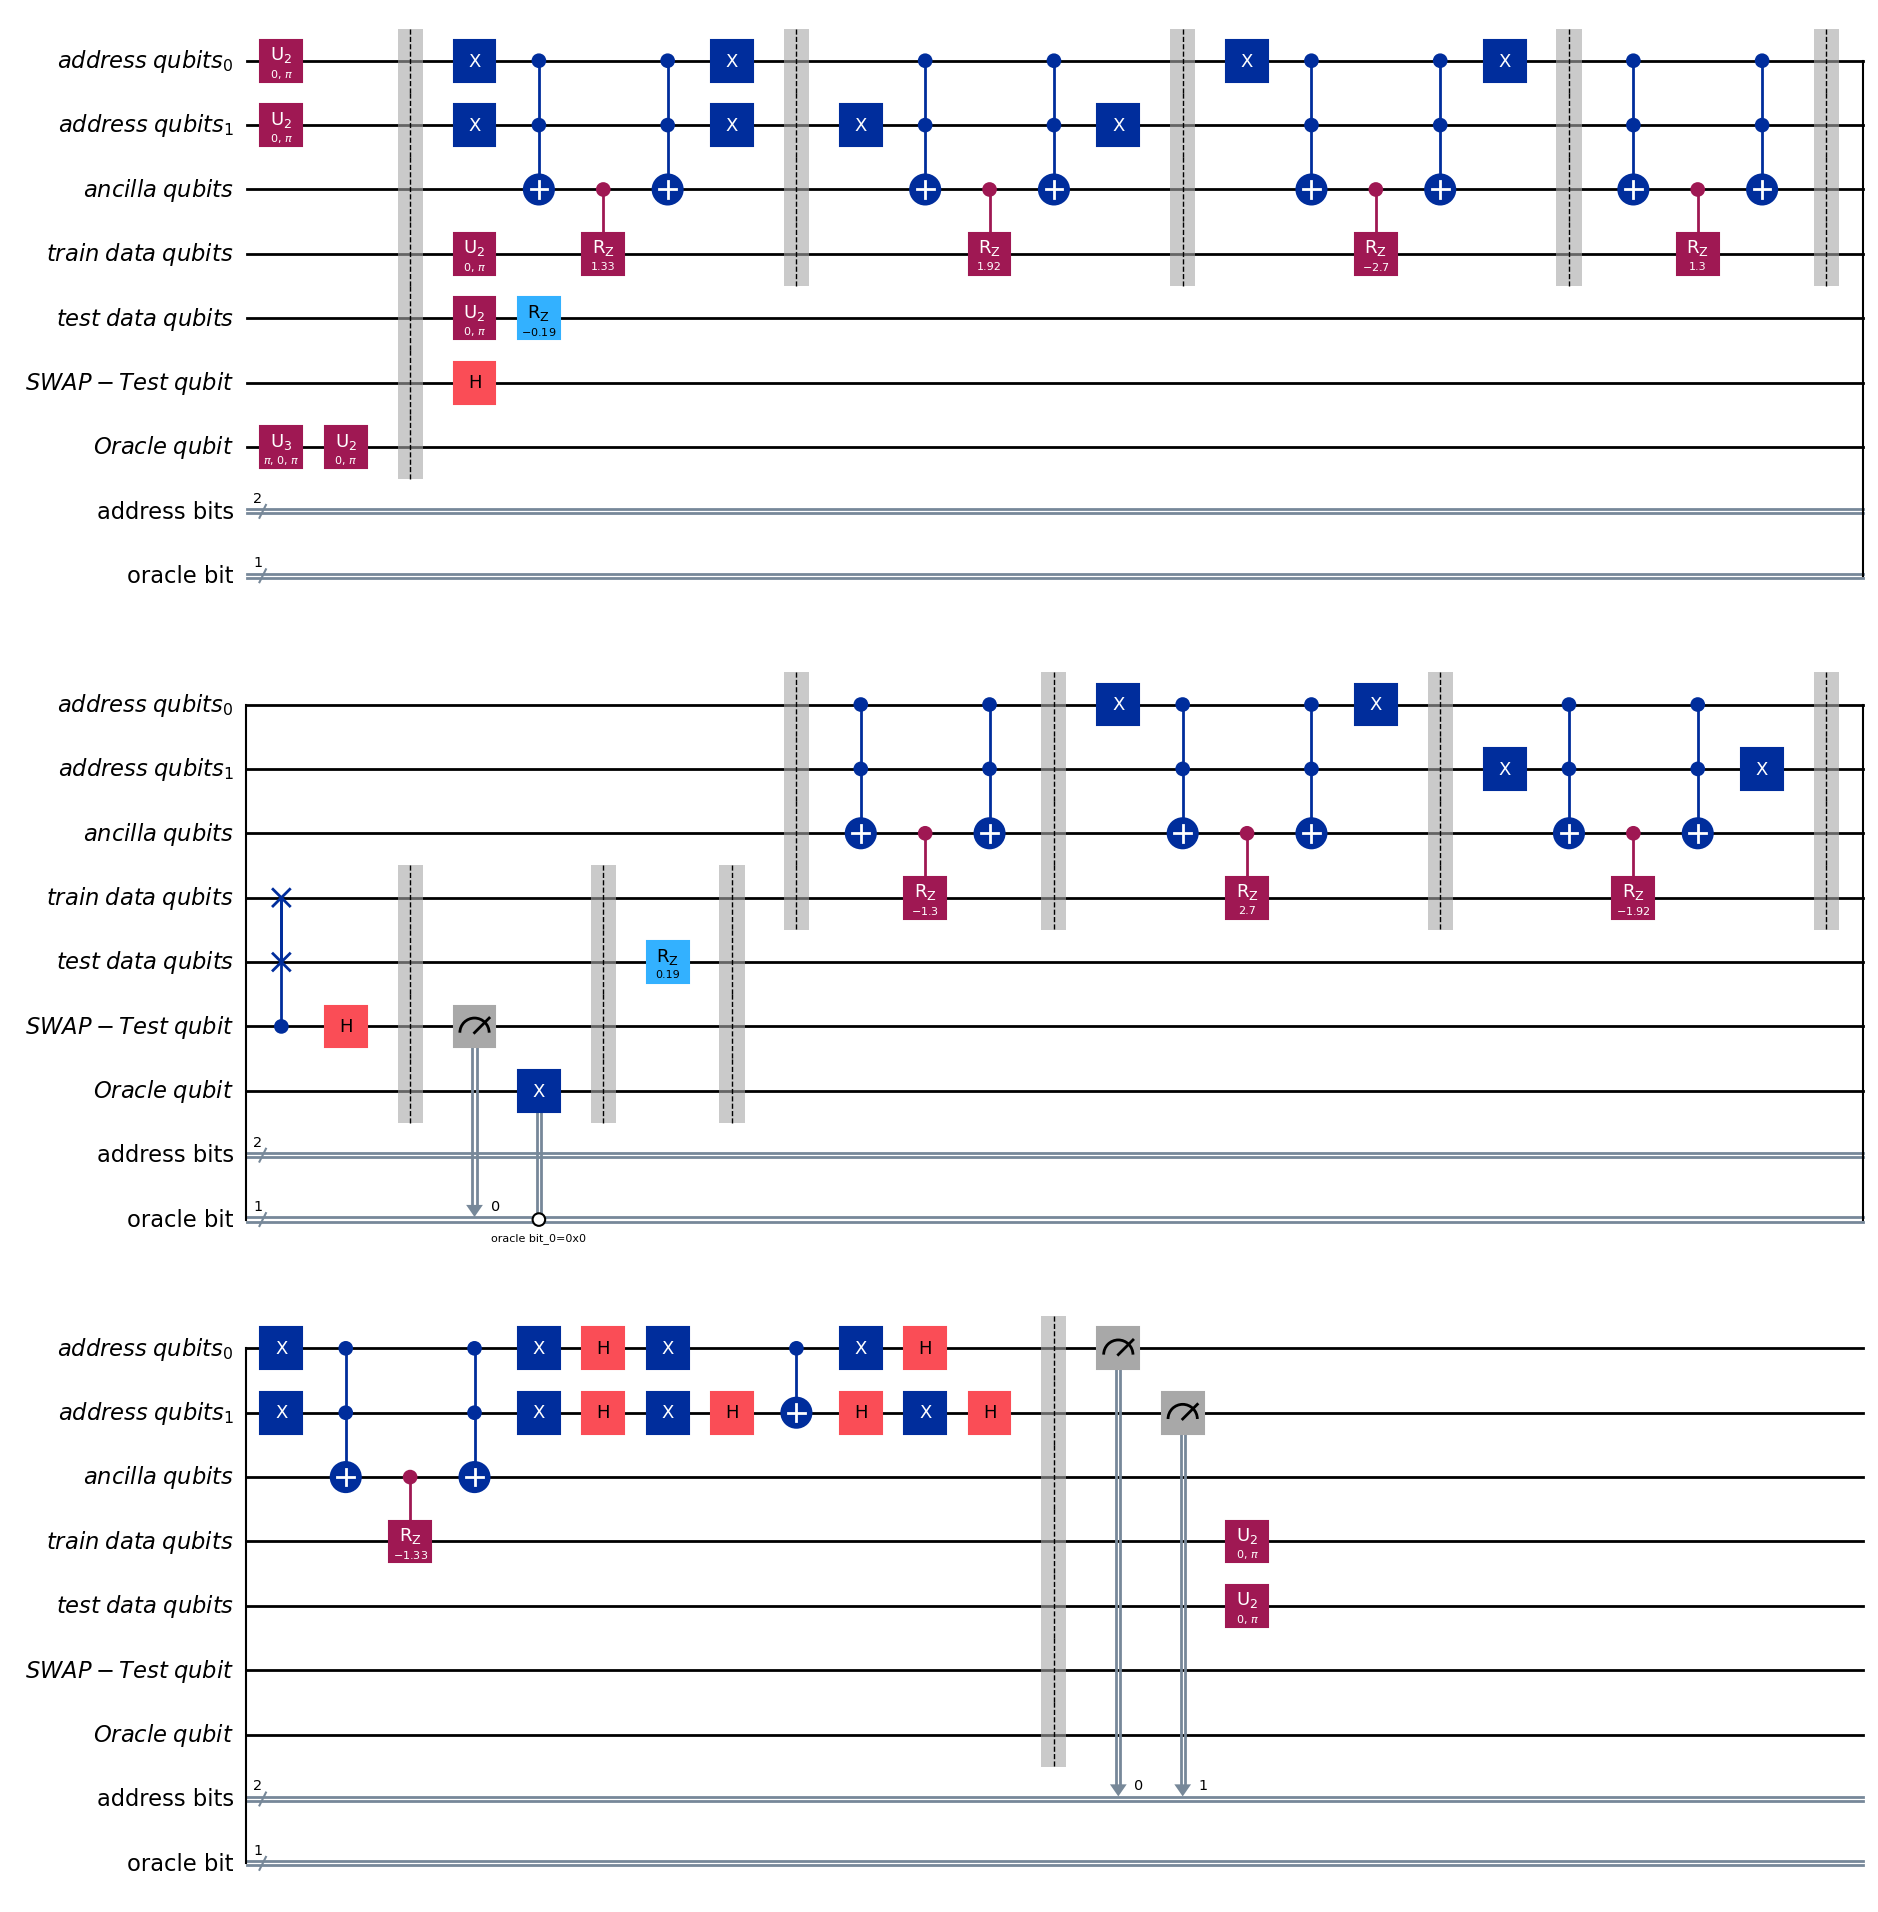

In [16]:
experiment_size = 10
min_QRAM = 3
max_QRAM = 7
qknn_e = qknn_experiments(
    x_test=x_test,
    x_train=x_train,
    y_test=y_test,
    y_train=y_train,
    features=features,
    min_QRAM=min_QRAM,
    max_QRAM=max_QRAM,
    max_trials=1,
    rotation="rz",
    experiment_size=experiment_size)

print(qknn_e.experiments_knn(k=1))
qknn_e.print_results()
qknn_e.draw_qknn(0).decompose().draw("mpl")